Start Time: January 23, 2024
End Time: 

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import linear_model
import matplotlib.pyplot as plt
import random

# 1. Two-dimention data

## 1.1 Create data and visualization

the intercept is -0.5986275849892874 and the coefficient is 0.53376686590539


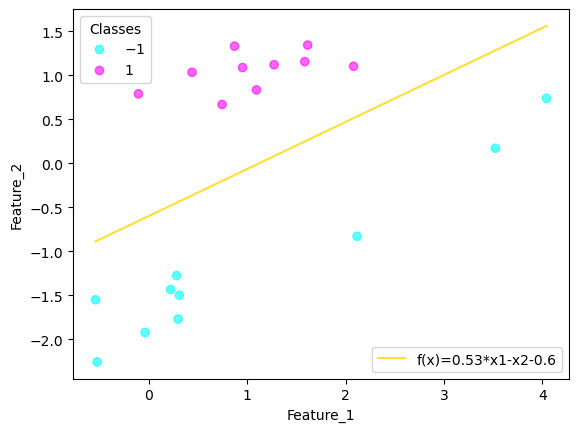

In [61]:
# two-dimention data
td_data = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=24)

td_data = list(td_data)
td_data[1] = np.array([1 if i == 0 else -1 for i in td_data[1]])
td_data = tuple(td_data)

# visualized data
fig, ax = plt.subplots()
scatter = ax.scatter(td_data[0][:, 0], td_data[0][:, 1], c=td_data[1], alpha=0.6, cmap="cool")
legend_1 = ax.legend(*scatter.legend_elements(), title="Classes", loc="upper left")
ax.add_artist(legend_1)
ax.set_xlabel("Feature_1")
ax.set_ylabel("Feature_2")

# add minimal residual sum of squares line as gold standard
reg = linear_model.LinearRegression()

# reshape for model fitting
reg.fit(td_data[0][:, 0].reshape(-1, 1), td_data[0][:, 1].reshape(-1, 1))
print(f"the intercept is {reg.intercept_[0]} and the coefficient is {reg.coef_[0][0]}")
formula = f"f(x)={round(reg.coef_[0][0], 2)}*x1-x2{round(reg.intercept_[0], 2)}"

# create a x axis for plotting
create_x_axis = np.linspace(min(td_data[0][:, 0]), max(td_data[0][:, 0]), 100).reshape(-1, 1)
predicted_value = reg.predict(create_x_axis)

ax.plot(create_x_axis, predicted_value, c="gold", alpha=0.8, label=formula)
handles, labels = ax.get_legend_handles_labels()
legend_2 = ax.legend(handles, labels, loc="lower right")

plt.show()

## 1.2 manually fit data

The loss function 
$$
\min\mathbf{L}\mathcal{(\omega, b)} = -\sum_{x_{i}} \mathcal{y_{i}(\omega\cdot x_{i} + b)}
$$

In [57]:
# take the partial derivative of w and b
def partial_derivative_w(data_point, label_point):
    # feature_1 * feature_2 * y
    result_w_1 = data_point[0] * label_point
    result_w_2 = data_point[1] * label_point
    return [result_w_1, result_w_2]

def partial_derivative_b(label_point):
    # label
    result_b = label_point
    return result_b

# decision function. w and b will be change if exist data point make 
def decision_funtion(weight_1, weigh_2, intercept):
    # if y*(w*x+b) < 0, the data point is wrongly classified.
    result = td_data[1] * ((td_data[0][:, 0] * weight_1) + (td_data[0][:, 1] * weight_2) + intercept)

    if len(result[np.where(result < 0)]) != 0:
        print(result)
        wrong_dp_index = np.where(result == result[np.where(result < 0)][0])[0][0]
        wrong_dp = td_data[0][wrong_dp_index]
        wrong_lb = td_data[1][wrong_dp_index]
        return [True, wrong_dp, wrong_lb]
    else:
        print("interation end")
        return [False, None, None]

def plot_function(weight_1, weight_2, intercept):
    fig, ax = plt.subplots()
    scatter = ax.scatter(td_data[0][:, 0], td_data[0][:, 1], c=td_data[1], alpha=0.6)
    ax.legend(*scatter.legend_elements(), title="Classes")
    ax.set_xlabel("Feature_1")
    ax.set_ylabel("Feature_2")
    b = intercept/weight_2
    hyperplane = [(-(weight_1/weight_2) * i) - b for i in create_x_axis]
    ax.plot(create_x_axis, hyperplane, c='green', alpha=0.5)
    plt.show()


[ 0.10015448  0.09889057  0.09168037  0.09878305 -0.09182241 -0.09827754
  0.09883335  0.09913507 -0.09625733  0.08615338 -0.09657831 -0.09365411
 -0.09499666 -0.10041879  0.10207126 -0.09707575 -0.095703    0.10213198
 -0.09377272  0.08411028]
The 1 iteration	weight_1=0.003930341000573079	weight_2=0.1921450847418017	intercept=-0.1



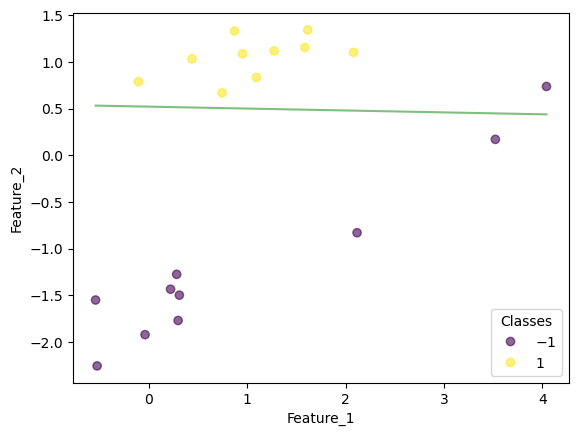

[ 0.3775294   0.18522347 -0.28927151  0.22233003  0.65271403  0.29136808
  0.27715681  0.22902862  0.41073927 -0.77954165  0.44006647  0.60019145
  0.48485988  0.12880013  0.54529846  0.28599     0.39180555  0.41295984
  0.55759634 -0.99864547]
The 2 iteration	weight_1=0.21199336665370402	weight_2=0.30228801002808986	intercept=0.0



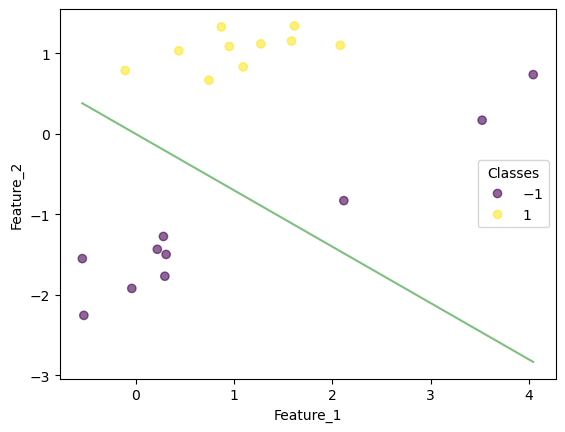

[ 0.68084398  0.48545136  0.35021307  0.55294354  0.23360688  0.21236572
  0.63493482  0.53363915  0.22889853  0.04746077  0.30224812  0.30625993
  0.2386335   0.13813555  0.78228604  0.10202236  0.15211803  0.5689395
  0.24930408 -0.12403428]
The 3 iteration	weight_1=0.000316259951895298	weight_2=0.38528254372450327	intercept=-0.1



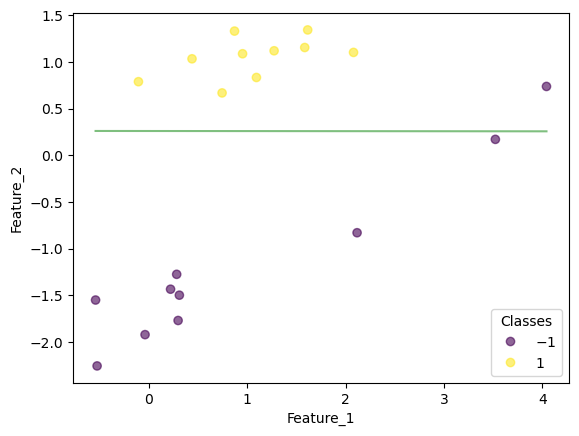

[ 0.92442418  0.80542148  1.37486939  0.90250608 -0.61614477  0.02091332
  1.00183393  0.84168422 -0.16586308  1.55763489 -0.03935135 -0.33509227
 -0.28315768  0.14660408  0.85651058 -0.24337028 -0.32075546  0.57834148
 -0.39548162  1.54925775]
The 4 iteration	weight_1=-0.4039671322355054	weight_2=0.3115926566653651	intercept=-0.2



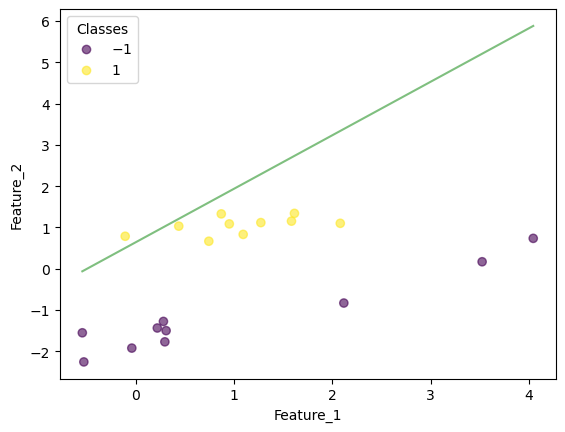

[ 6.91010275e-01  5.52706256e-01  7.73289017e-01  6.27644054e-01
 -1.64406745e-01  1.35983420e-01  7.09648038e-01  5.90170138e-01
  5.21618441e-02  7.37163535e-01  1.43794705e-01  1.93347042e-03
 -7.44630890e-04  1.66374676e-01  6.99875471e-01 -3.77580025e-02
 -5.46578596e-02  4.76930317e-01 -5.08532535e-02  6.62395491e-01]
The 5 iteration	weight_1=-0.19590410658237445	weight_2=0.4217355819516533	intercept=-0.1



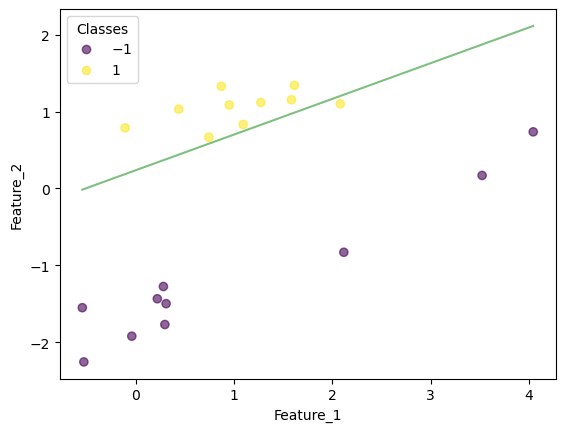

[ 0.81082208  0.53445292  0.32427983  0.62829374  0.48981012  0.44093068
  0.7428334   0.60241081  0.4700193  -0.11458134  0.57139567  0.58571076
  0.48735947  0.33098504  0.95806304  0.29056865  0.36455202  0.66059473
  0.50589546 -0.35993296]
The 6 iteration	weight_1=0.012158919070756502	weight_2=0.5318785072379415	intercept=0.0



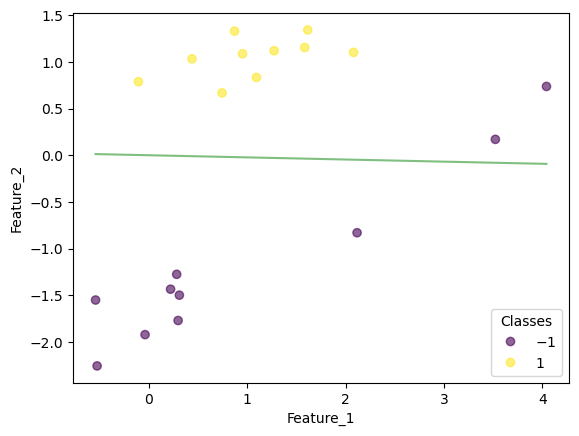

[ 1.10860968  0.87437502  1.2614323   1.00244842 -0.22188267  0.30030055
  1.1423531   0.93796758  0.15426955  1.20783883  0.31115261  0.06472964
  0.06211886  0.35530449  1.12094303  0.00197453 -0.02887773  0.74029424
 -0.02520235  1.08319593]
The 7 iteration	weight_1=-0.3401417493014969	weight_2=0.5148665718301537	intercept=-0.1



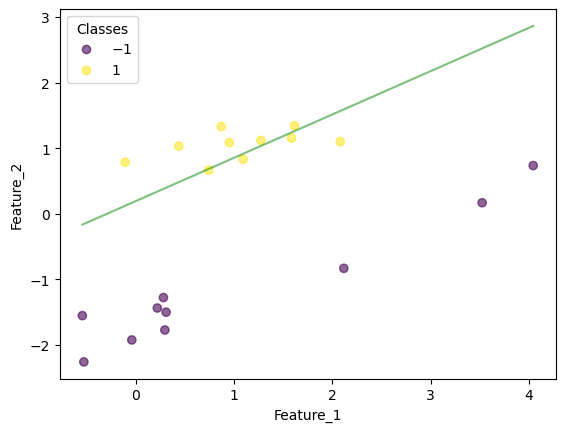

interation end
The 8 iteration	weight_1=-0.13207872364836593	weight_2=0.6250094971164419	intercept=0.0



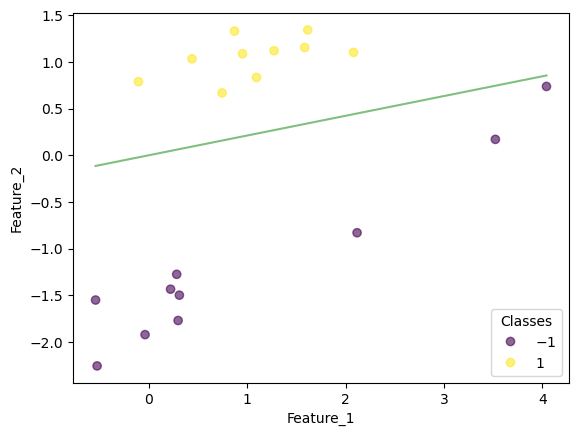

In [59]:
# initiate weight, intercept and learning rate
weight_1 = 0
weight_2 = 0
intercept = 0
learn_rate = 0.1


# iteration times
iteration_times = 1000

# random value in two dimention data
random_index = random.randint(0, 19)
feature_point = td_data[0][random_index]
label_point = td_data[1][random_index]
# it is not correctly classified for any data point resulting in loss function equte 0.

for iteration in range(iteration_times):
    # w1 = w0 + (learn_rate * y * x)
    new_weight_1 = weight_1 + (learn_rate * partial_derivative_w(feature_point, label_point)[0])
    new_weight_2 = weight_2 + (learn_rate * partial_derivative_w(feature_point, label_point)[1])
    # b1 = b0 + learn_rate * y
    new_intercept = intercept + (learn_rate * partial_derivative_b(label_point))
    
    # decision
    decision_condition, wrong_dp, wrong_lp = decision_funtion(new_weight_1, new_weight_2, new_intercept)
    
    if decision_condition:
        weight_1 = new_weight_1
        weight_2 = new_weight_2
        intercept = new_intercept
        # wrong data point
        feature_point = wrong_dp
        label_point = wrong_lp
        print(f"The {iteration + 1} iteration\tweight_1={weight_1}\tweight_2={weight_2}\tintercept={intercept}\n")
        plot_function(weight_1, weight_2, intercept)
    else:
        print(f"The {iteration + 1} iteration\tweight_1={new_weight_1}\tweight_2={new_weight_2}\tintercept={new_intercept}\n")
        plot_function(new_weight_1, new_weight_2, new_intercept)
        break
    

In [56]:
td_data[1] * ((td_data[0][:, 0] * -0.2802467073680614) + (td_data[0][:, 1] * 0.5259954022531406) + 0.1)

array([0.89965966, 0.64996492, 0.92976555, 0.7750861 , 0.09625694,
       0.5204728 , 0.9141616 , 0.71634601, 0.40490956, 0.79782903,
       0.55547315, 0.353539  , 0.33178281, 0.54428719, 0.93923193,
       0.24261036, 0.2317049 , 0.56366071, 0.26290765, 0.64538548])

In [46]:
new_weight_1/new_weight_2

-0.08996114601314983

In [47]:
new_intercept/new_weight_2

-0.270174990109014